In [100]:
import sys
import xml.etree.ElementTree as ET

!{sys.executable} -m pip install --break-system-packages -r ./requirements.txt

Defaulting to user installation because normal site-packages is not writeable
  Using cached argparse-1.4.0-py2.py3-none-any.whl.metadata (2.8 kB)
Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [108]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from basic_colors import *
from SlideShow import SlideShow

from PIL import Image, ImageDraw, ImageFont

In [102]:
def is_raspberry_pi():
    try:
        with open('/proc/cpuinfo', 'r') as f:
            cpuinfo = f.read()
        return 'Raspberry Pi' in cpuinfo or 'BCM' in cpuinfo
    except FileNotFoundError:
        return False

DEBUG = False
RPI=is_raspberry_pi()
ASSETS = "assets"
FONTS = "fonts"
FONT = 'Font.ttf'

LCD_WIDTH   = 128 #LCD width
LCD_HEIGHT  = 64  #LCD height

import SH1106_mock as SH1106
from INA219_mock import *
   
ina219 = INA219(addr=0x43)

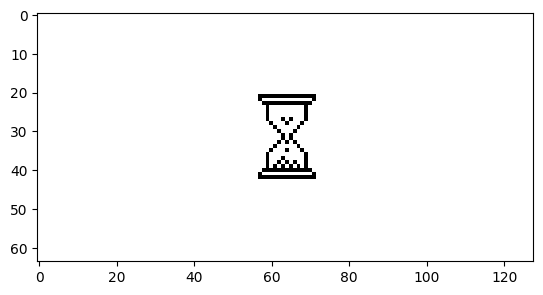

In [103]:
img_path = os.path.join('documentation', 'images', 'loading.png')
img = Image.open(img_path)
img = img.resize((LCD_WIDTH, LCD_HEIGHT))  # Změna velikosti na rozměry displeje
img = img.convert('L')  # Převod na stupně šedi
trashold = 50
img = img.point(lambda x: 0 if x < trashold else 255, '1')
img = img.convert('1') # Převod na jednobitový formát (černobílý)

# plot the image on the display
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

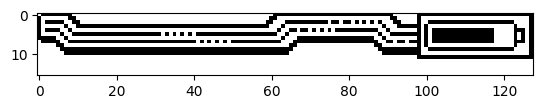

In [104]:
# status bar 

def frame_image(img, padding=2):
    """
    Add a frame to the image.
    """
    # Create a new image with padding
    new_width = img.width + 2 * padding
    new_height = img.height + 2 * padding
    new_img = Image.new('1', (new_width, new_height), 0)
    # black rectangle
    draw = ImageDraw.Draw(new_img)
    draw.rectangle([0, 0, new_width-1, new_height-1], fill=1, outline=0)
    # Paste the original image onto the new image
    new_img.paste(img, (padding, padding))
    return new_img

def battery_add_remaining_capacity(battery, remaining_capacity):
    """
    Add remaining capacity to the battery image.
    """
    # add rectangle to battery image
    new_img = Image.new('1', (battery.width, battery.height), 0)
    draw = ImageDraw.Draw(new_img)
    # Paste the original image onto the new image
    new_img.paste(battery, (0, 0))
    # Draw the remaining capacity
    draw.rectangle([2, 2, int((battery.width-5) * (remaining_capacity / 100)), battery.height-3], fill=0, outline=0)
    return new_img

# 'Common'
status_bar_path = os.path.join(ASSETS, 'icons', 'StatusBar')
canvas = Image.new('1', (LCD_WIDTH, int(LCD_HEIGHT/4)), 1)
background = Image.open(os.path.join(status_bar_path, 'Background_128x11.png'))
canvas.paste(background, (0, 0))

# 'Battery'
battery = Image.open(os.path.join(status_bar_path, 'Battery_26x8.png'))
battery = battery_add_remaining_capacity(battery, 84)
#battery = battery_add_remaining_capacity(battery, 100)
canvas.paste(frame_image(battery), (98, 0))
plt.imshow(canvas, cmap='gray', vmin=0, vmax=255)
plt.show()


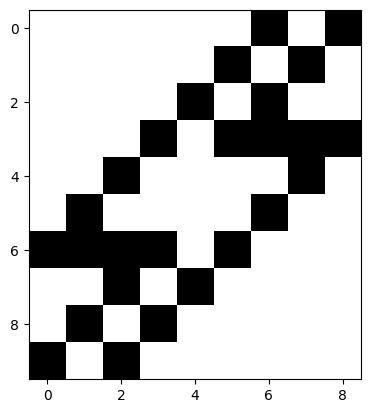

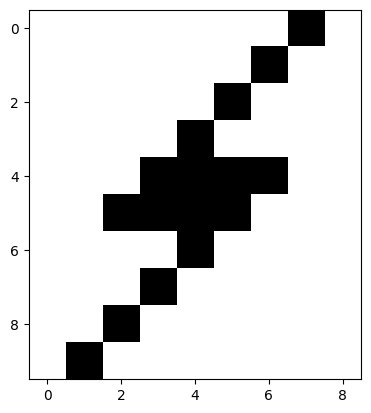

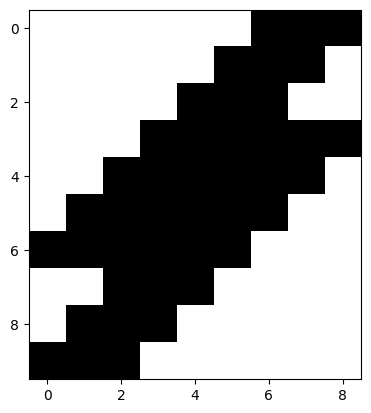

In [105]:
# charging icon
charging_icon = Image.open(os.path.join(status_bar_path, 'Charging-lightning_9x10.png'))
plt.imshow(charging_icon, cmap='gray', vmin=0, vmax=255)
plt.show()

charging_icon_mask_middle = Image.open(os.path.join(status_bar_path, 'Charging-lightning_mask_9x10.png'))
plt.imshow(charging_icon_mask_middle, cmap='gray', vmin=0, vmax=255)
plt.show()

charging_icon_mask = Image.new('1', (charging_icon.width, charging_icon.height), 0)
charging_icon_mask.paste(charging_icon, (0, 0), mask=charging_icon_mask_middle)
plt.imshow(charging_icon_mask, cmap='gray', vmin=0, vmax=255)
plt.show()

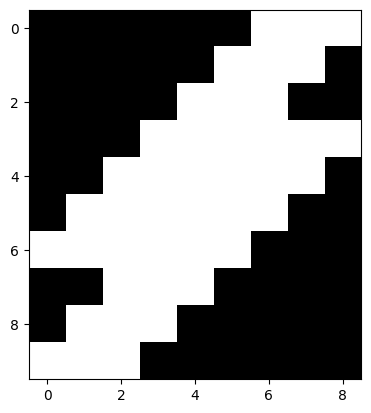

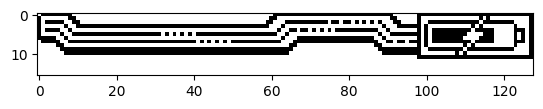

In [106]:
charging_icon_mask = charging_icon_mask.point(lambda p: 255 if p == 0 else 0, mode="1")
plt.imshow(charging_icon_mask, cmap='gray', vmin=0, vmax=255)
plt.show()
canvas_new = canvas.copy()
canvas_new.paste(charging_icon, (108, 1), mask=charging_icon_mask)

plt.imshow(canvas_new, cmap='gray', vmin=0, vmax=255)
plt.show()

In [ ]:
# Loading slide show
path = os.path.join(ASSETS, 'icons', 'Common', 'Loading_24')
frame_rate_file = os.path.join(path, 'frame_rate')

# create animation
def animate(slideshow, frame_rate, duration=0.1):
    """
    Animate the slides.
    """
    time_stemp = time.time()
    while time_stemp + duration > time.time():
        frame = slideshow.next_frame()
        # clear the output
        clear_output(wait=True)
        # display the frame
        plt.imshow(frame, cmap='gray', vmin=0, vmax=255)
        plt.axis('off')
        plt.show()
        time.sleep(1 / frame_rate)

slides = SlideShow()
slides.init_from_path(path)
animate(slides, slides.frame_rate, duration=5)



NameError: name 'os' is not defined